## Question 1

#### a. 
The calculation was wrong because the outliers were not removed. Through my observation, the data contained some abnormal and inaccurate data. For example, user 607 had orders with extremely large amount recurrently. This could be analyzed as a business to business (B2B) case rather than a regular business to customer (B2C) case. Thus, user 607 should be excluded from the data. In addition, inaccurate data were also misleading. There are many records with abnormally large order amount but small items quantity, which was not consistent with our assumption that sneakers were affordable. All those outliers influenced the result and made average order value very large, so they should all be removed. Therefore, I filtered out all the records with order amount larger than 1500 and ensured they are outliers by printing them out.

#### b.
   1. Most customers bought one or two items in one order.
   2. Credit card was the most commonly used payment method.
   3. Customers were more likely to shop on Wednesday and Thursday.
   4. Customers were less likely to shop at the end of the month.

#### c.
AOV = 302.29

In [35]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/yaoruofan/Downloads/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [7]:
for column in data.columns:
    uniques = sorted(data[column].unique())
    print(column, len(uniques))

order_id 5000
shop_id 100
user_id 301
order_amount 258
total_items 8
payment_method 3
created_at 4991


In [17]:
data[(data['order_amount'] > 1500)&(data['total_items']<5)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
1384,1385,78,867,25725,1,cash,2017-03-17 16:38:06


In [18]:
data[(data['order_amount'] > 1500)&(data['total_items']>5)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00


In [19]:
# remove outliers
data_clean = data[data['order_amount'] < 1500]
data_clean.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000
mean,2499.781199,49.848055,849.762966,302.285251,1.994125
std,1444.125385,29.063861,86.845863,159.477154,0.981989
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1247.750000,24.000000,775.000000,163.000000,1.000000
50%,2497.500000,50.000000,850.000000,284.000000,2.000000
75%,3751.250000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1408.000000,8.000000


### EDA

<AxesSubplot:xlabel='total_items', ylabel='count'>

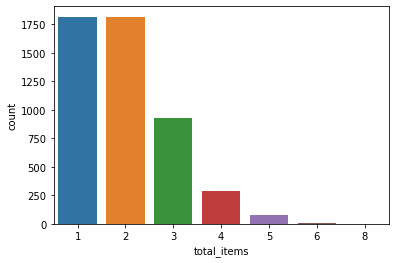

In [22]:
sns.countplot(x='total_items', data=data_clean)

<AxesSubplot:xlabel='order_amount', ylabel='Count'>

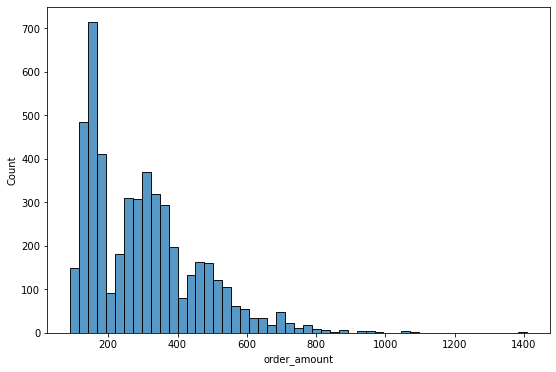

In [28]:
plt.figure(figsize=(9,6))
sns.histplot(x='order_amount', data=data_clean)

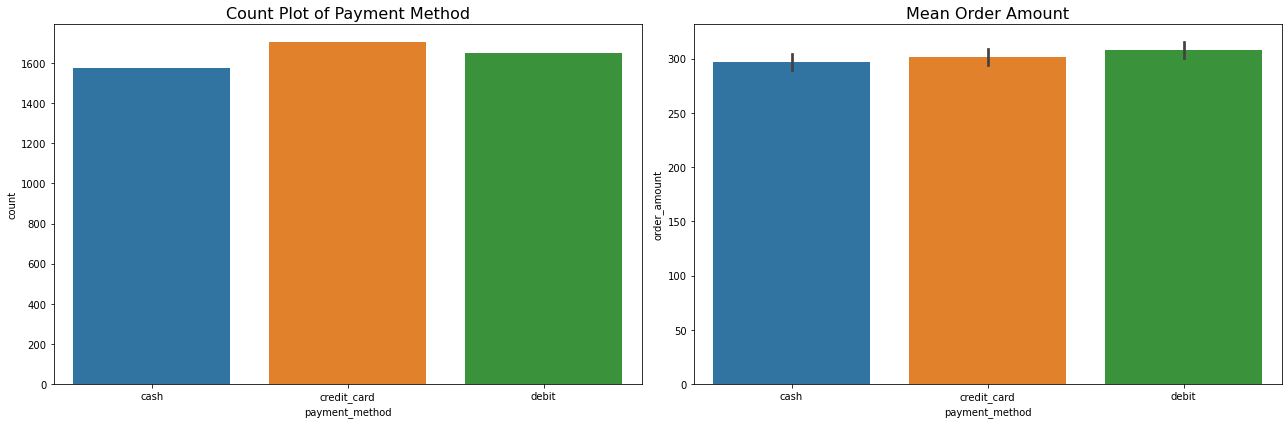

In [20]:
grouped = data_clean[['order_amount', 'payment_method']].groupby('payment_method').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='payment_method', data=data_clean, ax=ax[0])
ax[0].set_title('Count Plot of Payment Method', fontsize=16)
sns.barplot(x='payment_method', y='order_amount', data=data_clean, ax=ax[1]);
ax[1].set_title('Mean Order Amount', fontsize=16)
plt.tight_layout()
plt.show()

In [30]:
grouped

,payment_method,order_amount
0,cash,297.046349
1,credit_card,301.415105
2,debit,308.176044


In [36]:
data_clean['created_at'] = pd.to_datetime(data_clean['created_at'])

In [37]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4936 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        4936 non-null   int64         
 1   shop_id         4936 non-null   int64         
 2   user_id         4936 non-null   int64         
 3   order_amount    4936 non-null   int64         
 4   total_items     4936 non-null   int64         
 5   payment_method  4936 non-null   object        
 6   created_at      4936 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 437.5+ KB


In [38]:
data_clean['day_of_week'] = data_clean['created_at'].dt.day_name()
data_clean['day_of_week']

0          Monday
1          Friday
2         Tuesday
3          Sunday
4       Wednesday
          ...    
4995     Thursday
4996     Thursday
4997       Sunday
4998     Thursday
4999     Saturday
Name: day_of_week, Length: 4936, dtype: object

<AxesSubplot:>

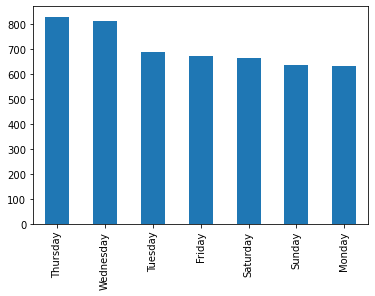

In [40]:
data_clean['day_of_week'].value_counts().plot.bar()

In [55]:
grouped_d = data_clean[['order_amount', 'day_of_week']].groupby('day_of_week').mean().reset_index()
grouped_d.sort_values('order_amount',ascending=False)

,day_of_week,order_amount
3,Sunday,308.985827
2,Saturday,308.125000
4,Thursday,306.121687
1,Monday,305.367670
0,Friday,299.652303
5,Tuesday,298.757971
6,Wednesday,291.146371


In [44]:
data_clean['date'] = data_clean['created_at'].dt.date
data_clean['date']

0       2017-03-13
1       2017-03-03
2       2017-03-14
3       2017-03-26
4       2017-03-01
           ...    
4995    2017-03-30
4996    2017-03-16
4997    2017-03-19
4998    2017-03-16
4999    2017-03-18
Name: date, Length: 4936, dtype: object

In [56]:
date_count = data_clean.groupby(data_clean['date'])[['order_id']].nunique().reset_index()
date_count.columns = ['date','order_count']
date_count

,date,order_count
0,2017-03-01,181
1,2017-03-02,177
2,2017-03-03,162
3,2017-03-04,163
4,2017-03-05,162
5,2017-03-06,148
6,2017-03-07,194
7,2017-03-08,156
8,2017-03-09,197
9,2017-03-10,166


<AxesSubplot:xlabel='date'>

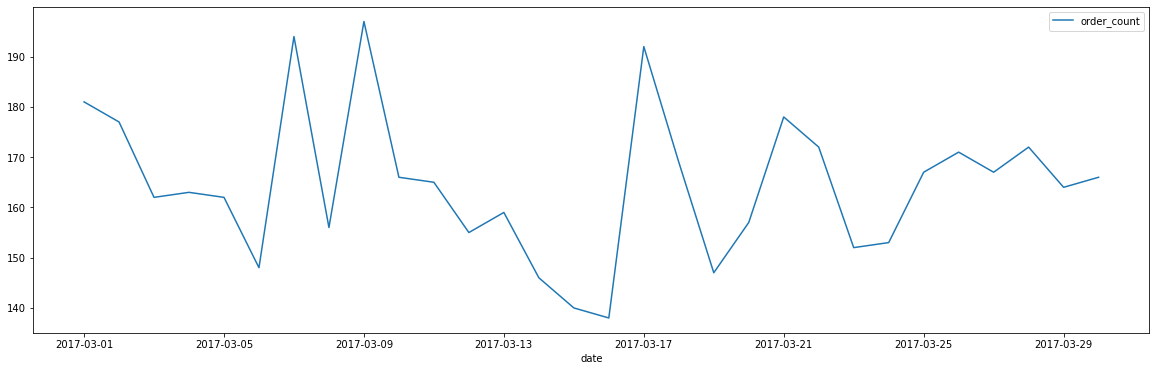

In [57]:
date_count.plot(x = 'date',y = 'order_count',figsize=(20,6))

In [58]:
date_sum = data_clean.groupby(data_clean['date'])[['order_amount']].sum().reset_index()
date_sum.columns = ['date','amount_sum']
date_sum

,date,amount_sum
0,2017-03-01,54704
1,2017-03-02,51484
2,2017-03-03,48729
3,2017-03-04,48604
4,2017-03-05,49118
5,2017-03-06,42266
6,2017-03-07,57850
7,2017-03-08,43432
8,2017-03-09,62662
9,2017-03-10,47148


<AxesSubplot:xlabel='date'>

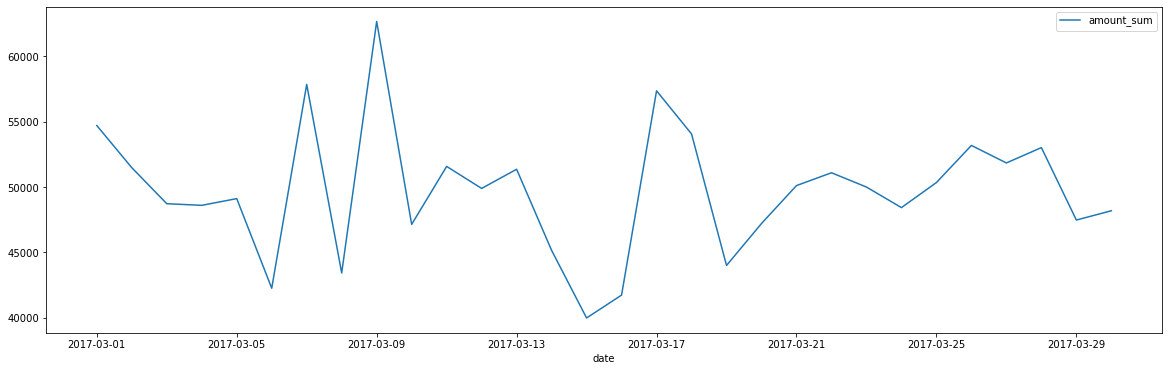

In [59]:
date_sum.plot(x = 'date',y = 'amount_sum',figsize=(20,6))

## Question 2

#### a.
54 <br>
SELECT count(distinct OrderID) from orders join shippers using(ShipperID)
where ShipperName = 'Speedy Express'

#### b.
Peacock <br>
SELECT LastName FROM Employees <br>
where EmployeeID = (select EmployeeID from orders<br>
group by EmployeeID<br>
order by count(distinct OrderID) desc

#### c.
Boston Crab Meat <br>
SELECT ProductName FROM [Products]<br>
where ProductID = (SELECT od.ProductID FROM OrderDetails od left join orders o on od.OrderID = o.OrderID<br>
join customers c on o.CustomerID = c.CustomerID<br>
where Country = 'Germany'<br>
group by od.ProductID<br>
order by sum(quantity) desc<br>
limit 1)
